# Comments on the Examples

We have seen two sets of data that give pH rate prfiles from work dony in Tony Kirby's group at cambridge. 

## Example 2

In the second example the author describe how they obtained the rate constants for each step in a consecutive reaction. 

the reaction scheme is shown below...

$$A \xrightarrow{k_1} B + C \\ 
B \xrightarrow{k_2} C$$

The total reaction is...

$$A \xrightarrow{k_{obs{}}} 2C $$

There are two possibilities.

1. The first step is rate-determining. The kinetics will be the same as if the reaction produced two products in a single step.
2. The second is rate-determining.The kinetics will follow that of a consecutive reaction. See notebook `6_PhysOrgExamples/6_1_start.ipynb` for some code that has already been written for consecutive reactions.

The author present integrated rate equations for the observed absorbance for each of the two cases above. For the first case they used the total reaction with $k_{obs}$. In the second case they presented a much more complicatde equation. Can you integrate these equations. I can't. Thats why I use *Python*.

## Symbolic Integration

For the first case we can treat it as a simple first-order reaction with the rate consant of $k_{obs}$.

*SymPy* can perform integration and differentiation operations on many expressions. Let us explore integrating the simple rate equations that you are familiar with.

# Integrating First Order Reaction for A

The basic first order reaction might be described as such...

$$ A \xrightarrow{k} 2C $$ 

The rate can be expressed as the disappearance of A over time and is equal to the rate constant multiplied by the concentration of reacatant at a given time point...

$$ -\frac{d}{dt}[A]_t = k[A]_t $$

We can state that the amount of reactant consumed at a give time point is $x$ and that the concentration of reactant is the initial concentration less this value.

$$ [A]_t = [A]_0 - x $$

Substitute this into the equation for rate and we get...

$$ -\frac{d}{d t}([A]_0 - x) = k([A]_0 - x) $$

...which can be simplified to give...

 $$   \frac{d x}{d t} = k([A]_0 - x) $$

In your first year calculus class you would solve this by collecting the differentials for $x$ and $t$ on either side of the equation and then integrating each side over the span of time.

$$ \frac{d x}{[A]_0 - x} = k\,dt $$
$$ \int_0^x \frac{d x}{[A]_0 - x} = \int_0^t k\,dt $$

# Using *SymPy* Substitutions
Here I will demonstrate the symbolic math features of *SymPy*. Here we start with the rate law and use *SymPy* to make the substitutions discussed above. We will start with...

$$ -\frac{d}{dt}[A]_t = k[A]_t $$

...and then substitute in the expression for $A_t$ in terms of $x$ using *SymPy*

$$ [A]_t = [A]_0 - x $$

We will the solve the differential that is prosuced by the substitution. Observe we get the same answer.

# Absorbance

he authors observed the reaction as absorbance at 256nm over time. The absorbance contributed by each species is give by Beers law (assuming a 1 cm path length, as always)

$$ Abs_A = \epsilon_A [A]$$

In [106]:
import sympy as sym

t = sym.symbols('t')     # create t as a 'symbol', not a variable
k1 = sym.symbols('k1')     # create k as a 'symbol'
At = sym.symbols('A_t')  # create At as a 'symbol'
A0 = sym.symbols('A0')   # create A0 as a 'symbol'

xt = sym.Function('x_t')    # create x as a 'function', not a variable

lhs = sym.Derivative(-At, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = k1*(At)

diffeq = sym.Eq(lhs, rhs)   # create a sympy equation
print("The initial differential equation is...")
display(diffeq)             # display that equation

diffeq = diffeq.subs({At: (A0 - xt(t))})

print("After substituting the differential equation is...")
display(diffeq)             # display that equation


print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})     # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
display(res)
#dir(diffeq)

The initial differential equation is...


Eq(Derivative(-A_t, t), A_t*k1)

After substituting the differential equation is...


Eq(Derivative(-A0 + x_t(t), t), k1*(A0 - x_t(t)))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A0 - A0*exp(-k1*t))

In [107]:
x = sym.symbols('x')     # create x as a 'symbol', not a variable or function

xt_rhs = res.rhs   # Get the expression for x(t)
print("The expression for x(t) is...")
display(xt_rhs)

eq1 = sym.Eq(At, A0-x)  # create an equation that defines A(t) in terms of A0 and x
print("The equation for A(t) in terms of x(t) is...")
display(eq1)

A = eq1.subs(x, xt_rhs)  # xt is an expression for x. Substitute x for xt.
print("The equation for A(t) after substituting in the term for x(t)")
display(A)


The expression for x(t) is...


A0 - A0*exp(-k1*t)

The equation for A(t) in terms of x(t) is...


Eq(A_t, A0 - x)

The equation for A(t) after substituting in the term for x(t)


Eq(A_t, A0*exp(-k1*t))

# Integrating First Order Reaction for C

We could find the expression for C easily by just stating that $[C]_t = 2([A]_0-[A]_t)$. 


In [108]:
xt_rhs = res.rhs   # Get the expression for x(t)
print("The expression for x(t) is...")
display(xt_rhs)

eq2 = sym.Eq(Ct, 2*xt_rhs)  # create an equation that defines X(t) in terms of A0 and x
print("The equation for C(t) in terms of x(t) is...")
display(eq2)

rhs = sym.collect(eq2.rhs,2*A0)
C = sym.Eq(eq2.lhs,rhs)
print("After collecting some terms...")
display(C)

The expression for x(t) is...


A0 - A0*exp(-k1*t)

The equation for C(t) in terms of x(t) is...


Eq(C_t, 2*A0 - 2*A0*exp(-k1*t))

After collecting some terms...


Eq(C_t, 2*A0*(1 - exp(-k1*t)))

## Absorbance

the authors followed the reaction by absorbance. The amount of $A$ is decreasing and the amount of $C$ is increasing. If the final aborbance is different than the initial (e.q. A and C have different extinction coefficients) then we should be able to get kinetic parameters from an equation that describes the change in absorbance vs. time. 

The total $Abs$ will be $Abs_A(t) + Abs_C(t)$

And we can say that...

$$Abs(t) = \epsilon_A\cdot A_t + \epsilon_C\cdot C_t$$

$$Abs(t) = \epsilon_A\cdot A_{0} e^{- k t} + \epsilon_C\cdot 2 A_{0}(1-e^{- k t})$$

When we begin, the initial absorbance is due to $[A]_0$ and so we can say that $Abs_0 = \epsilon_A\cdot A_{0}$ and so if...

$$A_{0} = \frac{Abs_0}{\epsilon_A}$$

...then we can say that

$$Abs(t) = \epsilon_A\cdot \frac{Abs_0}{\epsilon_A} e^{- k t} + \epsilon_C\cdot 2 \frac{Abs_0}{\epsilon_A}(1-e^{- k t})$$

and after we simplify we get the same equation as the authors present in their paper (eq. 2). It is a useful exercise to check the math in any paper. Printing errors are common, especially in typeset equations and figures that are often reinterpretted in the printing process (especially a risk in older papers.)

$$Abs(t) =  {Abs_0} e^{- k t} + \frac{\epsilon_C}{\epsilon_A} 2 Abs_0(1-e^{- k t})$$

Now let us do all of that with *Python*


In [109]:
display(A)
display(C)

At_ = A.rhs      # expressions for concentrations
Ct_ = C.rhs

e_A = sym.symbols(r'\epsilon_A')   # extinction coefficients
e_C = sym.symbols(r'\epsilon_C') 

Abs_A = sym.symbols(r'Abs_A')   # variables for absotrbances
Abs_C = sym.symbols(r'Abs_C')
Abs_0 = sym.symbols('Abs_0')

Total = e_A*At_ + e_C*Ct_           # total absorbance
Total = Total.subs(A0, Abs_0/e_A)
display(Total)



Eq(A_t, A0*exp(-k1*t))

Eq(C_t, 2*A0*(1 - exp(-k1*t)))

Abs_0*exp(-k1*t) + 2*Abs_0*\epsilon_C*(1 - exp(-k1*t))/\epsilon_A

## Integrating Consecutive Reactions

Note: I stole most of this math from a [free textbook](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_for_the_Biosciences_(Chang)/09%3A_Chemical_Kinetics/9.04%3A_More_Complex_Reactions).

### The System of Reactions

For reactions of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we can identify the rate of formation of each species by writing their rate laws as differential equations...

$$\begin{align}
\dfrac{d \left[ \text{A} \right]_t}{dt} &= -k_1 \left[ \text{A} \right]_t \\
\dfrac{d \left[ \text{I} \right]_t}{dt} &= k_1 \left[ \text{A} \right]_t - k_2 \left[ \text{I} \right]_t \\
\dfrac{d \left[ \text{P} \right]_t}{dt} &= k_2 \left[ \text{I} \right]_t 
\end{align}$$

### Integrating for [A]

We have already done this above. the integrated rate law for $[A]_t$ is known...

$$\left[ \text{A} \right]_t = \left[ \text{A} \right]_0 e^{-k_1 t}$$

### Integrating for [I]

Substitute the integrated rate law for $[A]$ into the rate law for $[I]$ above...

$$\dfrac{d \left[ \text{I} \right]_t}{dt} = k_1 \left[ \text{A} \right]_0 e^{-k_1 t} - k_2 \left[ \text{I} \right]_t$$

As before we can set a value, $x$, that describes the progress of the reaction. We can state that $[I]_t = x$ and set up a differential equation like so...

$$ \frac{d}{d t}{x} = A_{0} k_{1} e^{- k_{1} t} - k_{2} x$$

My integration skills are very rusty. Do I use integration by parts or integration by substitution? rather than relearn calculus I truyne to the symbolic math tools of sympy. Consider the code below.

In [110]:
import sympy as sym

t = sym.symbols('t')     # create t as a 'symbol', not a variable
#k1 = sym.symbols('k1')     # create k as a 'symbol'
k2 = sym.symbols('k2')     # create k as a 'symbol'
#At = sym.symbols('A_t')  # create At as a 'symbol'
#A0 = sym.symbols('A0')   # create A0 as a 'symbol'
It = sym.symbols('I_t')   # create A0 as a 'symbol'

xt = sym.Function('x_t')    # create x as a 'function', not a variable

lhs = sym.Derivative(It, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = k1*(A0)*sym.exp(-k1*t)-k2*It

diffeq = sym.Eq(lhs, rhs)   # create a sympy equation
print("The initial differential equation is...")
display(diffeq)             # display that equation

diffeq = diffeq.subs({It: xt(t)})

print("After substituting the differential equation is...")
display(diffeq)             # display that equation


print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})     # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
display(res)

print("Collecting some terms and substiting for x gives...")
simplified = sym.collect(res.rhs,(A0*k1/(k1-k2)))
I = sym.Eq(It,simplified)
display(I)


The initial differential equation is...


Eq(Derivative(I_t, t), A0*k1*exp(-k1*t) - I_t*k2)

After substituting the differential equation is...


Eq(Derivative(x_t(t), t), A0*k1*exp(-k1*t) - k2*x_t(t))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A0*k1*exp(-k2*t)/(k1 - k2) - A0*k1*exp(-k1*t)/(k1 - k2))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Now we have the term...

$$ x =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

...and, knowing that $[I]_t = x$, we can now say...

$$ \left[I \right]_t =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

### Integrating for C

We dont have to integrate for this last term. We can say that the total amount of material is equal to $[A]_0$ and so...

$$\begin{align}
[A]_0 &= [A]_t+[I]_t+[P]_t \\
[P]_t &= [A]_0 - \left([A]_t+[I]_t\right) 
\end{align}$$

For the fun of it, lets let sympy do all the work in the code below...

In [111]:
Pt = sym.symbols('P_t')   # create Pt as a 'symbol'

display(A,I)


rhs = A0 - A.rhs - I.rhs
display(rhs)

rhs = sym.collect(rhs,A0)
display(rhs)

P = sym.Eq(Pt,rhs)
display(P)


Eq(A_t, A0*exp(-k1*t))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

-A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + A0 - A0*exp(-k1*t)

A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 1 - exp(-k1*t))

Eq(P_t, A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 1 - exp(-k1*t)))

In [112]:
display(A,I,P)

Eq(A_t, A0*exp(-k1*t))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Eq(P_t, A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 1 - exp(-k1*t)))

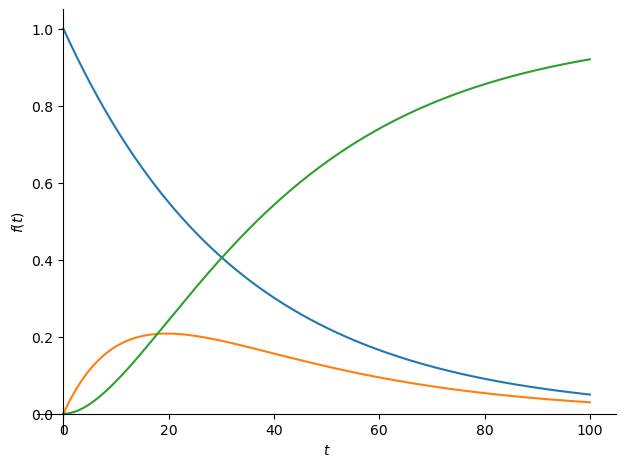

In [154]:
import matplotlib.pyplot as plt

k1_rate = .03
k2_rate = 0.08
A0_conc = 1

t_range = [t,0,100]

eq1 = A.rhs
#display(eq)

eq1 = eq1.subs({k1:k1_rate, A0:A0_conc})



eq2 = I.rhs
eq2 = eq2.subs({k1:k1_rate, k2:k2_rate, A0:A0_conc})

eq3 = P.rhs
eq3 = eq3.subs({k1:k1_rate, k2:k2_rate, A0:A0_conc})


p1 = sym.plot([eq1],t_range, show=False)
p2 = sym.plot([eq2],t_range, show=False)
p3 = sym.plot([eq3],t_range, show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()
plt.show()